# Movie Correlation Analysis

### Goal: To conduct an exploratory data analysis on a movie dataset using Python, including data cleaning and visualisations (scatter plots and correlation matrices) to reveal insights into the relationships among various features of the dataset.
_
### Tool: Anaconda, Python, Matplotlib and Seaborn
 _
### Data: Movie Industry - https://www.kaggle.com/datasets/danielgrijalvas/movies

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('bmh')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data

df = pd.read_csv('/Users/chenhaoxin/Documents/DA Projects/Python - Correlation Movie Dataset/movies.csv.zip')

# Check data

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Exploratory Data Analysis - Data Cleaning

In [2]:
# Remove missing values

df = df.dropna()

# Check for percentage of missing data

for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, perc_missing))
    

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [3]:
# View data types for columns

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
# Change the data type of budget and gross columns to remove decimal points

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [5]:
# Check if decimal points are removed

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [6]:
# Create correct year column from "released"

NewDataFrame = df["released"].str.split(" ",n = 3,expand = True) 
NewDataFrame.rename(columns = {0: "Month", 1: "Day",2:"Year",3:"Country"}, inplace = True)
df['year_correct'] = NewDataFrame['Year']

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [7]:
# Drop duplicates

df.drop_duplicates()

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


## Explore Correlations Between Variables - Use Scatter Plots & Correlation Matrices

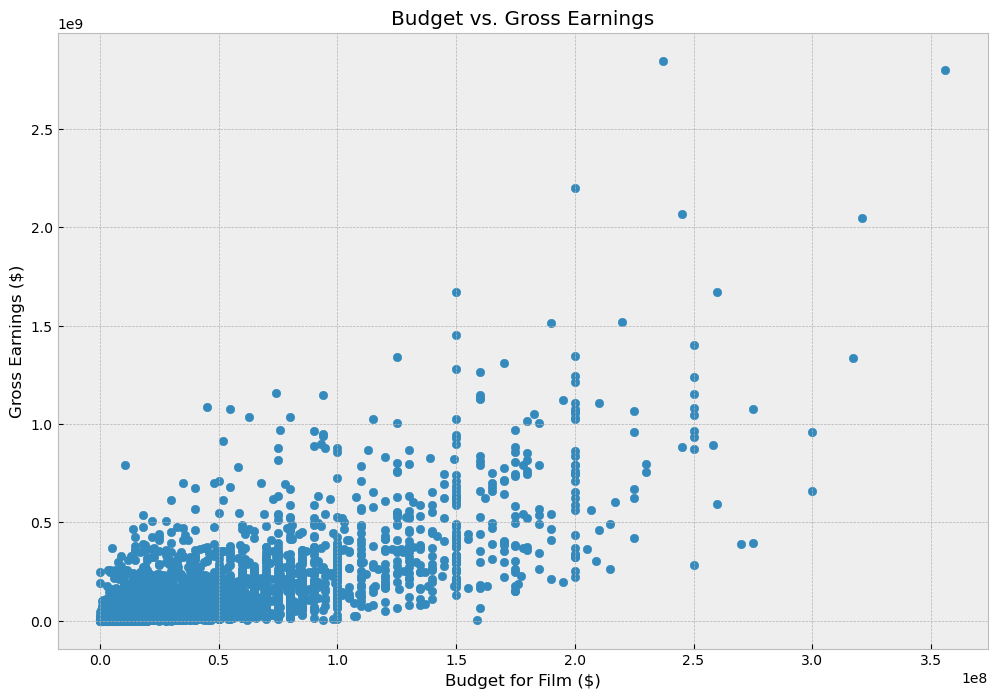

In [8]:
# Create a scatter plot - budget vs. gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs. Gross Earnings')

plt.xlabel('Budget for Film ($)')
plt.ylabel('Gross Earnings ($)')

plt.show()


In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


<AxesSubplot:xlabel='budget', ylabel='gross'>

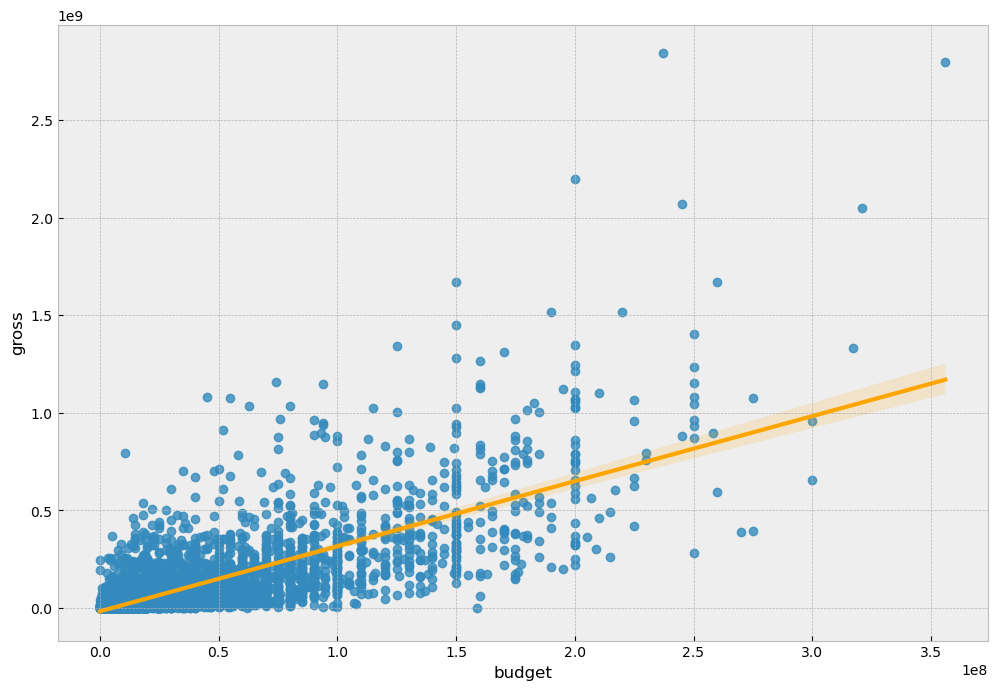

In [10]:
# Create a scatter plot for budget vs gross using seaborn for visualisation

sns.regplot(x = 'budget', y = 'gross', data = df, line_kws = {"color":'orange'})


### There appears to be a positive relationship between budget and gross earnings based on this scatter plot, with increases in budget generally corresponding to increases in gross earnings.

In [11]:
# Check correlation

df.corr(method = 'pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


### Output: a table of correlation coefficients where each cell represents the correlation between two variables.

### The correlation coefficients ranges from -1 to 1.
* ### Values closer to -1 indicating a negative correlation.
* ### Values closer to 1 indicating a positive correlation.
* ### A correlation coefficient of 0 indicates no correlation. 

### As shown in the table, the highest correlation is between budget and gross (0.74), followed by gross and votes (0.61).

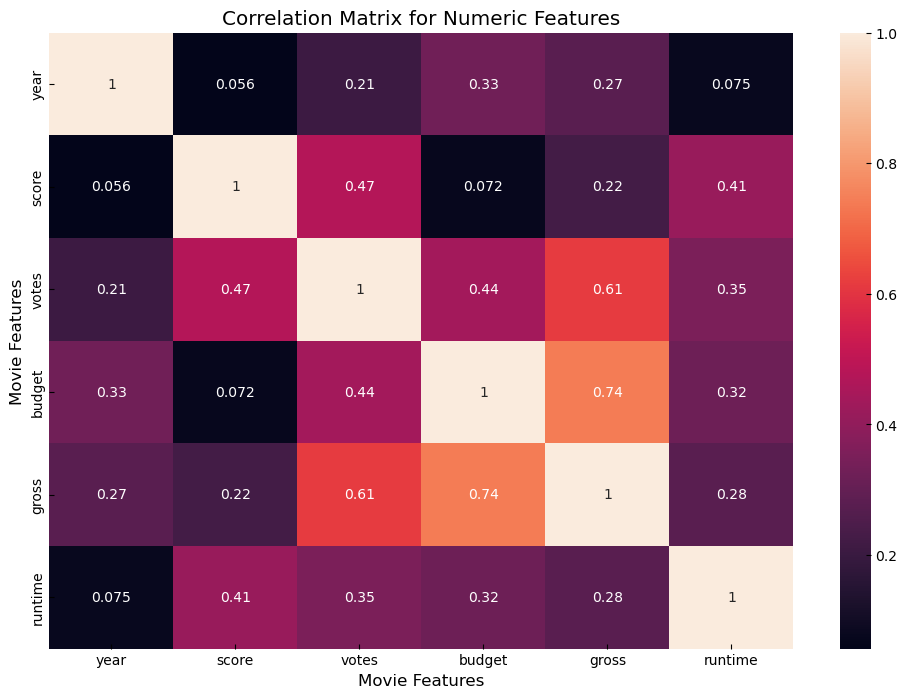

In [12]:
# Create a Correlation Matrix for numeric features

corr_matrix = df.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()


In [13]:
# Create numeric representation for categorical variables: "name", "genre", "company" etc. so they can also be included in the Correlation Matrix for comparison

df_numerized = df

for name in df_numerized.columns:
    if(df_numerized[name].dtype == 'object'):
        df_numerized[name] = df_numerized[name].astype('category') # change column type
        df_numerized[name] = df_numerized[name].cat.codes
        
df_numerized

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,2
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,2
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,2
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,2
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,2


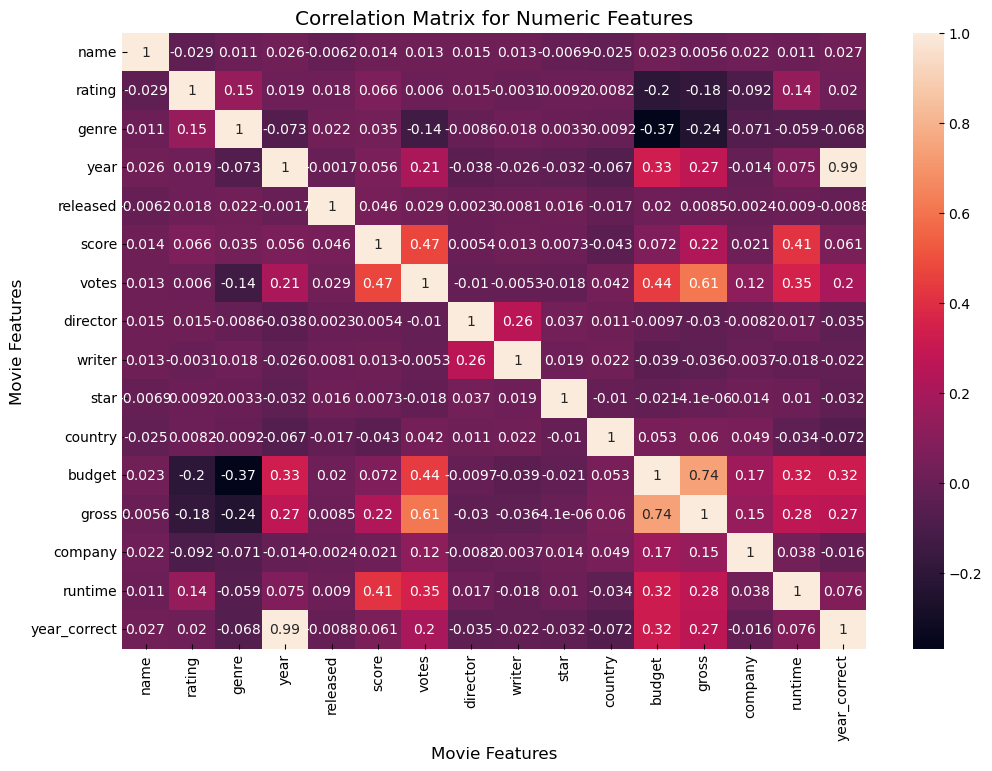

In [14]:
# Create a Correlation Matrix for all variables

corr_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()


### The values assigned randomly represent categorical variables measured at the Nominal scale and are used as a numeric identifier without any inherent meaning. Hence, an increase in the assigned value for a category does not correspond to a proportional increase in the measured variable's quantity. As a result, the correlation matrix shows weak correlations between categorical and numerical variables.

In [15]:
# Create a table showing correlation coefficients between each pair of variables in the DataFrame

df_numerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026784
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019749
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.067962
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.994821
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.008821
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061059
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.202953
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035162
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.022050
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.031631


In [16]:
corr_mat = df_numerized.corr()

# Transform the resulting symmetric matrix into a table where each row and column represents a pair of variables, 
# and each cell in the table represents the correlation coefficient between the corresponding pair of variables.

corr_pairs = corr_mat.unstack()

corr_pairs.head(25)


name    name            1.000000
        rating         -0.029234
        genre           0.010996
        year            0.025542
        released       -0.006152
        score           0.014450
        votes           0.012615
        director        0.015246
        writer          0.012880
        star           -0.006882
        country        -0.025490
        budget          0.023392
        gross           0.005639
        company         0.021697
        runtime         0.010850
        year_correct    0.026784
rating  name           -0.029234
        rating          1.000000
        genre           0.147796
        year            0.019499
        released        0.018083
        score           0.065983
        votes           0.006031
        director        0.014656
        writer         -0.003149
dtype: float64

In [17]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(15)


genre    budget         -0.368523
budget   genre          -0.368523
gross    genre          -0.244101
genre    gross          -0.244101
rating   budget         -0.203946
budget   rating         -0.203946
rating   gross          -0.181906
gross    rating         -0.181906
votes    genre          -0.135990
genre    votes          -0.135990
company  rating         -0.092357
rating   company        -0.092357
year     genre          -0.073167
genre    year           -0.073167
country  year_correct   -0.071611
dtype: float64

In [18]:
# Display pairs with a correlation coefficient greater than 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr


votes         gross           0.614751
gross         votes           0.614751
              budget          0.740247
budget        gross           0.740247
year_correct  year            0.994821
year          year_correct    0.994821
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

<AxesSubplot:xlabel='votes', ylabel='gross'>

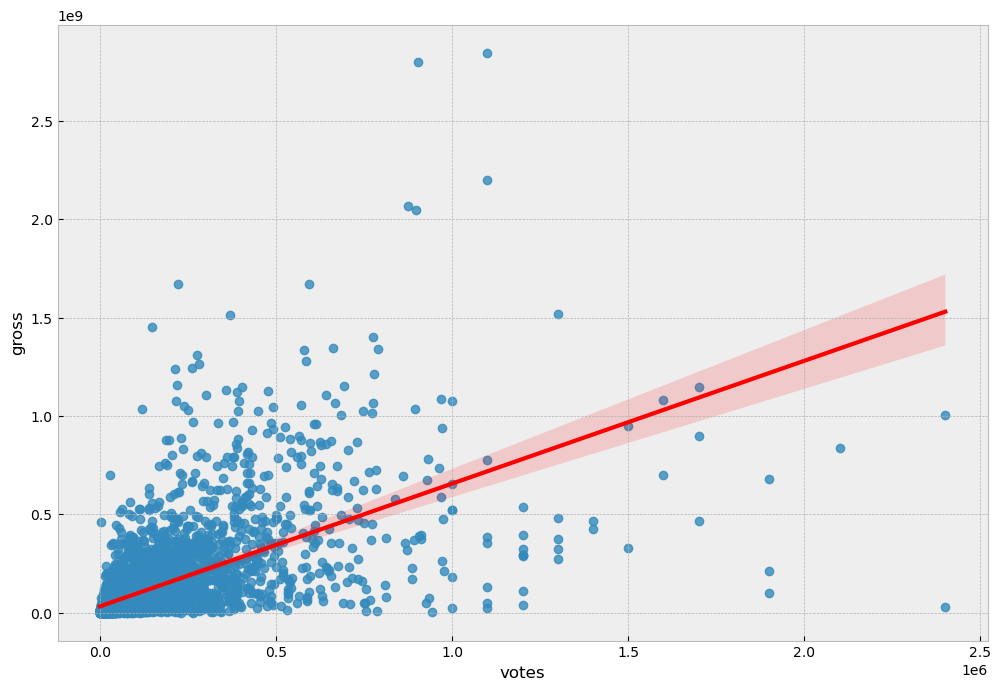

In [19]:
# Plot votes vs gross using seaborn for visualisation

sns.regplot(x = 'votes', y = 'gross', data = df, line_kws = {"color":'red'})


## Conclusion: 

### Based on the analysis conducted, it can be inferred that the variables with the strongest correlation to gross earnings are votes and budget. This observation is supported by the correlation coefficients of 0.61 and 0.74, respectively, which were obtained through the utilization of the Pearson correlation method. 

### These results suggest that the association between votes and budget with gross earnings is statistically significant, and should be considered as potentially impactful factors when seeking to maximize revenue in the film industry.